In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data_red = pd.read_csv("redwine_quality.csv")
data_red.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
print("There are {} rows and {} columns".format(data_red.shape[0], data_red.shape[1]))

There are 1599 rows and 12 columns


In [26]:
data_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

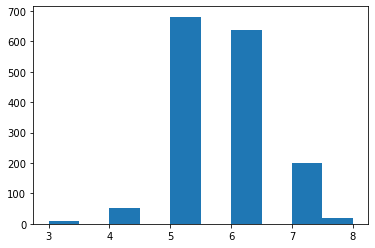

In [27]:
plt.hist(data_red["quality"])
plt.show()

In [28]:
data_red["quality"].groupby(data_red["quality"]).count()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

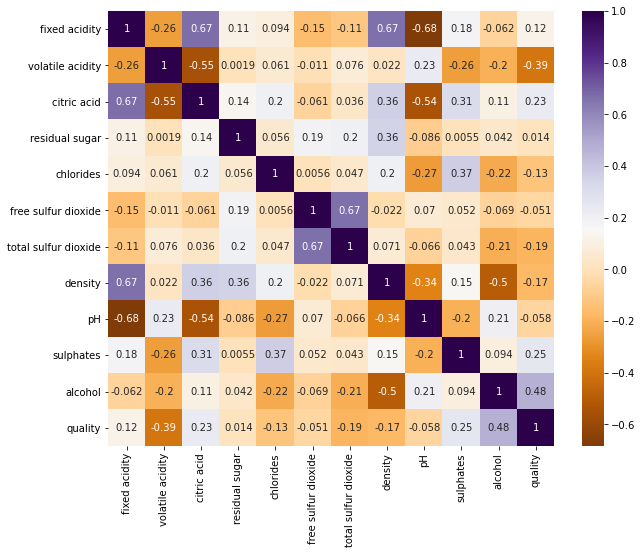

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(data_red.corr(), annot=True, cmap="PuOr")
plt.show()

In [33]:
data_red["good_quality"] = [0 if i<7 else 1 for i in data_red["quality"]]
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [34]:
data_red["good_quality"].groupby(data_red["good_quality"]).count()

good_quality
0    1382
1     217
Name: good_quality, dtype: int64

In [35]:
y = data_red["good_quality"]
X = data_red.drop(["good_quality", "quality"], axis=1)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)
print("Number of samples in training set:", X_train.shape[0])
print("Number of samples in testing set:", X_test.shape[0])

Number of samples in training set: 1199
Number of samples in testing set: 400


In [38]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)

In [40]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print("Accuracy", score)

Accuracy 0.9075


In [42]:
results_series = {"actual":y_test, "predicted":y_pred}
results = pd.DataFrame(results_series)
print("*** First 5 rows of results ***")
results.head()

*** First 5 rows of results ***


,actual,predicted
1109,0,0
1032,0,0
1002,1,1
487,0,0
979,0,0


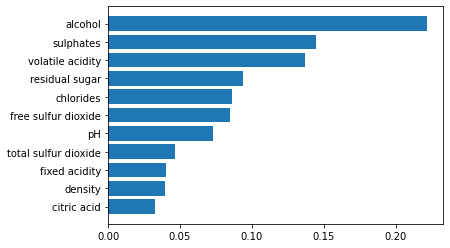

In [43]:
s = {'col1':X.columns, 'col2':model.feature_importances_}
df = pd.DataFrame(s)
df_sorted = df.sort_values('col2')
plt.barh(df_sorted["col1"], df_sorted["col2"])
plt.show()